In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [91]:
pic = cv2.imread('/Users/teguhsatya/Desktop/moiOneHundred/247.jpg')

In [92]:
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)

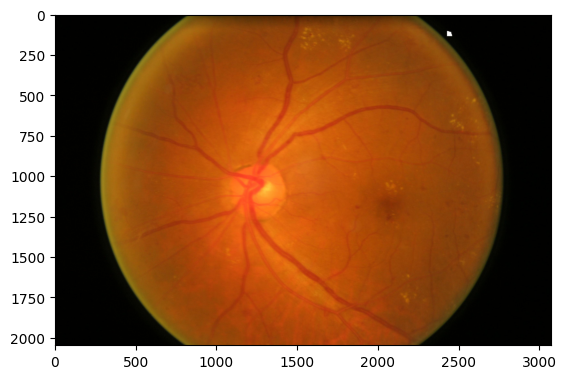

In [93]:
plt.imshow(pic)

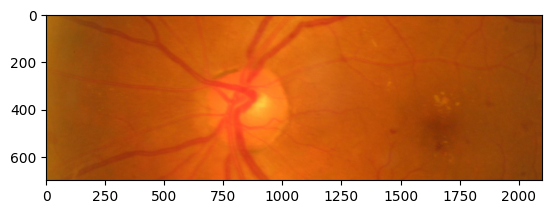

In [103]:
roi = pic[700:1400, 400:2500]
plt.imshow(roi)

In [104]:
def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

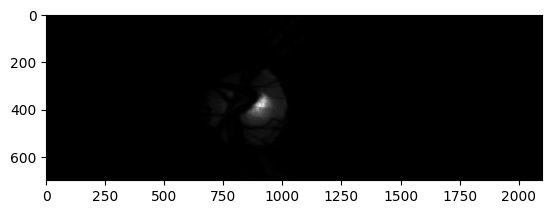

In [105]:
roihsv = cv2.cvtColor(roi.copy(), cv2.COLOR_RGB2HSV)
roihsv[:,:,2] = adjust_gamma(roihsv[:,:,2], 4)
rgb = cv2.cvtColor(roihsv, cv2.COLOR_HSV2RGB)
rgb[:,:,1] = adjust_gamma(rgb[:,:,1], 5)
plt.imshow(rgb[:,:,1], 'gray')


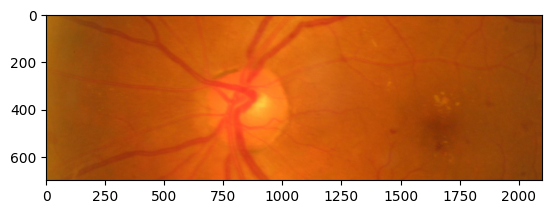

In [106]:
plt.imshow(roi)

181


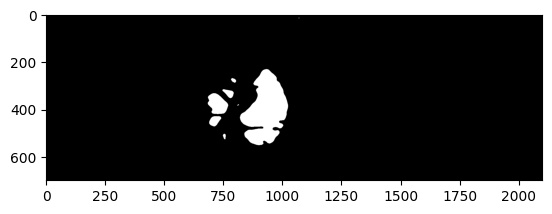

In [164]:
roi2lab = cv2.cvtColor(roi, cv2.COLOR_RGB2LAB)
roi2lab[:,:,0] = adjust_gamma(roi2lab[:,:,0], 2)
lab2rgb = cv2.cvtColor(roi2lab, cv2.COLOR_LAB2RGB)
lab2rgb[:,:,1] = adjust_gamma(lab2rgb[:,:,1], 2)
xyz = cv2.cvtColor(lab2rgb, cv2.COLOR_RGB2YUV)
blurred = cv2.medianBlur(xyz[:,:,1], 15)
gb = 255-blurred
print(gb.max())
ret, th = cv2.threshold(gb, 155, 255, cv2.THRESH_BINARY)

plt.imshow(th, 'gray')

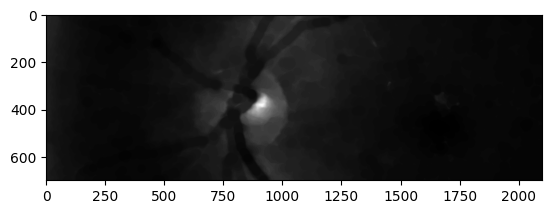

In [119]:
mkernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (35,35))
opened = cv2.morphologyEx(lab2rgb[:,:,1].copy(), cv2.MORPH_CLOSE, mkernel)
plt.imshow(opened, 'gray')

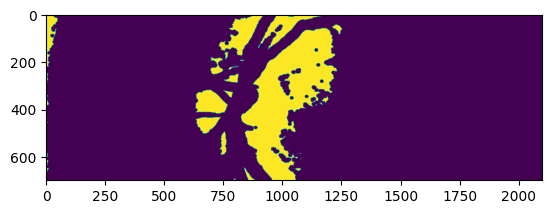

In [120]:
ret2,th2 = cv2.threshold(lab2rgb[:,:,1],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
erode = cv2.erode(th2, kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15)))
plt.imshow(erode)

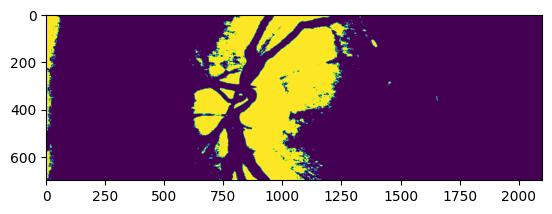

In [121]:
plt.imshow(th2)